#1. Primeiro projeto do curso de deep learning usando pytorch

##2. Importando as bibiliotecas

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import MaxAbsScaler
import torch as tt
import torch.nn as nn

ModuleNotFoundError: ignored

##3. Deixando o fator randomico de reprodutibilidade padrão em 1

In [ ]:
np.random.seed(1)
tt.manual_seed(1)

##4. Lendo os dados dos arquivos csv e plotando a classe

(569, 1)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


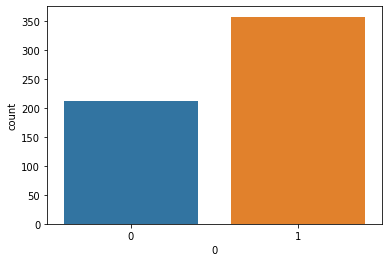

In [ ]:
previsores = pd.read_csv('/content/entradas_breast.csv')
predito = pd.read_csv('/content/saidas_breast.csv')
print(predito.shape)
quantidade_unico = np.unique(predito)
sns.countplot(predito['0'])

##5. Separando a base de dados em treinamento e teste

In [ ]:
ptreinamento,pteste,ctreinamento,cteste = train_test_split(previsores,predito,test_size=0.3)

##6. Redefinindo as variaveis para np array

In [ ]:
ptreinamento = np.array(ptreinamento)
pteste = np.array(pteste)
ctreinamento = np.array(ctreinamento)
cteste = np.array(cteste) 

##7. Normalizar as entradas

In [ ]:
ptreinamento_norm = MaxAbsScaler().fit(ptreinamento)
ptreinamento_norm = ptreinamento_norm.transform(ptreinamento)
ctreinamento_norm = MaxAbsScaler().fit(ctreinamento)
ctreinamento_norm = ctreinamento_norm.transform(ctreinamento)

##8. Trasnformar os dados em torch

In [ ]:
ptreinamento = tt.tensor(ptreinamento,dtype=tt.float)
pteste = tt.tensor(pteste,dtype=tt.float)
ctreinamento = tt.tensor(ctreinamento,dtype=tt.float)
cteste = tt.tensor(cteste,dtype=tt.float)

##9. Construir um dataset e um dataloader que é um array de micro batchs para o treinamento

In [ ]:
#construir o dataset pytorch
dataset = tt.utils.data.TensorDataset(ptreinamento,ctreinamento)
#construir o microbatch de treinamento
dataloader = tt.utils.data.DataLoader(dataset,batch_size=5,shuffle=True)

##10. Construir a rede

In [ ]:
#construindo os modelos
classificador = nn.Sequential(
        nn.Linear(in_features = 30, out_features = 16),
        nn.ReLU(),
        nn.Linear(in_features = 16, out_features = 16),
        nn.ReLU(),
        nn.Linear(in_features=16, out_features=1),
        nn.Sigmoid()
    )

##11. Aplicar os hiperparametros e a função de perda

In [ ]:
#função de erro 
er = nn.BCELoss()
#otimizadores
otm = tt.optim.Adam(classificador.parameters(), lr = 0.001, weight_decay=0.0001)

##12. Realizar o treinamento

In [ ]:
#treinamento
for epoch in range(100):
    ls = 0.0
    for data in dataloader:
        inputs, labels = data #separa as entradas e as saidas desejadas
        otm.zero_grad() #zera todos os gradientes
        outputs = classificador.forward(inputs) #faz o passo pra frente
        loss = er(outputs,labels) #Calcula o erro
        loss.backward() #reajusta os pesos
        otm.step() #calcula o gradiente
        ls = ls+loss.item()# Calcula o erro global
        print('Epoca: {}, Erro: {}'.format(epoch,ls/len(dataloader)))

##13. Ver os pesos do pós treinamento

In [ ]:
pesos = list(classificador.parameters())
print(pesos[0])

##14. Colocar a rede neural em modo de avaliação

In [ ]:
classificador.eval()

Sequential(
  (0): Linear(in_features=30, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=1, bias=True)
  (5): Sigmoid()
)

##15. Fazer a avaliação com os dados de teste

In [ ]:
previsoes = classificador.forward(pteste)

##16. transformar as variaveis em classifcadores binários

In [ ]:
#Nesse código, tudo que for maior que 0.5 é igual a 1, o que sobrar é 0
previsoes = np.array(previsoes > 0.5)

##17. Verificar a acurácia do modelo

In [ ]:
taxaacc = accuracy_score(cteste,previsoes)
print("Accuracy: {}".format(taxaacc))

Accuracy: 0.8713450292397661


##18. Fazer a matriz de confusão

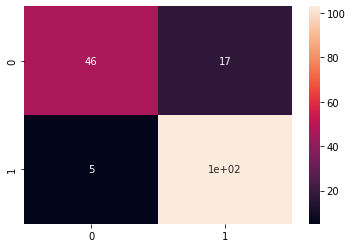

In [ ]:
mtconf = confusion_matrix(cteste,previsoes)
sns.heatmap(mtconf,annot=True)